**Let's get started!**
## Check out the data
Let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Uber Vienna🚙

For this Machine Learning project i will be analyzing some Uber Vienna call data from [Uber Movement Vienna](https://www.uber.com/en-ID/cities/vienna/) in July 2016. 
____
This Uber analytical assessment is modeled after real-world challenges that the company faces. Read the following terms, and get a feel for how they relate to each other in the context of Uber’s business model. 
* **“Eyes”** or **“eyeballs”** — The number of people who opened the Uber app within a given period of time.
    * If a single person opens the app twice within the given period of time, he or she is still only counted as one eyeball.
    * Eyeballs are not equal to requests. Remember, requests means the number of users looking for a ride; whereas eyeballs means the number of people who have opened the app.
* **“Zeroes”** — People who opened the Uber app but could not call a car because there were no available drivers within range.
    * A ‘zero’ usually occurs when demand exceeds supply within a given market.
    * With supply constant, as demand rises, more zeroes are likely to occur.
    * Zeroes are bad for Uber, because they mean lost revenue.
    * Whenever there is demand for an Uber car that the company is not able to fulfill, it means money lost.
* **“Request”** — The number of people who have requested an Uber car within the app.
* **“Completed requests”** — The number of requests that were fulfilled (i.e., resulted in a completed ride). If not given, “completed requests” are usually equal to “accepts” minus “cancellations”.
____
In this analysis, some notion of statistics and hypothesis test are used but are very easy to follow. This [handbook of statistics](http://www.biostathandbook.com/index.html) can be used as a reference to explain basics.


### Check out the Data

In [3]:
uber = pd.read_csv('Uberpractice.csv',sep = ',')

### Drop the unnecesary data

In [4]:
# Pass a list of NEW column names
uber = uber[['Eyes','Drivers', 'Zeroes','Requests','Completed',]]

# Print the size of the dataset
print ("Number of rows / How many records are included in the dataset? :", uber.shape[0])
print ("Number of columns: ", uber.shape[1])

Number of rows / How many records are included in the dataset? : 672
Number of columns:  5


In [5]:
uber.head(2)

,Eyes,Drivers,Zeroes,Requests,Completed
0,105,28,23,54,52
1,98,27,19,54,49


In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
Eyes         672 non-null int64
Drivers      672 non-null int64
Zeroes       672 non-null int64
Requests     672 non-null int64
Completed    672 non-null int64
dtypes: int64(5)
memory usage: 26.3 KB


In [7]:
uber.describe()

,Eyes,Drivers,Zeroes,Requests,Completed
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,163.382440,49.465774,33.471726,86.108631,80.791667
std,86.875321,26.664310,18.150368,46.467255,43.300441
min,28.000000,7.000000,5.000000,13.000000,13.000000
25%,98.000000,29.000000,21.000000,51.000000,47.000000
50%,147.000000,45.000000,29.500000,77.000000,73.000000
75%,210.000000,63.000000,42.000000,110.000000,103.000000
max,420.000000,143.000000,101.000000,248.000000,234.000000


In [8]:
uber.columns

Index(['Eyes', 'Drivers', 'Zeroes', 'Requests', 'Completed'], dtype='object')

# EDA (Exploratory Data Analysis)

Let's create some simple plots to check out the data!

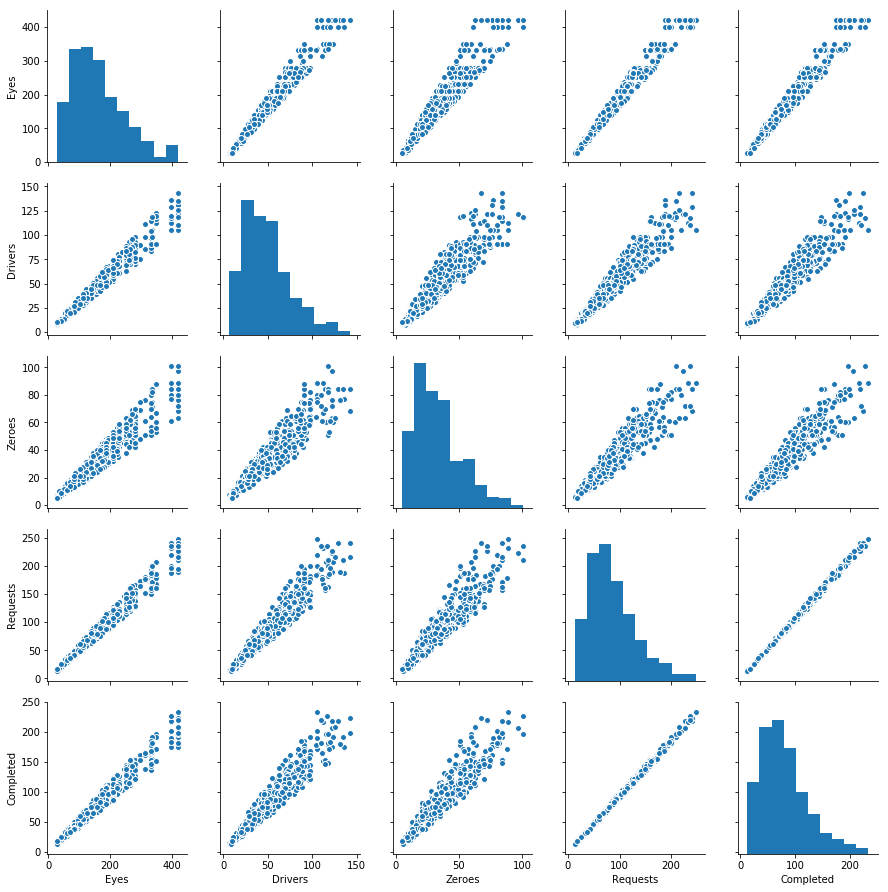

In [9]:
sns.pairplot(uber,palette='husl')

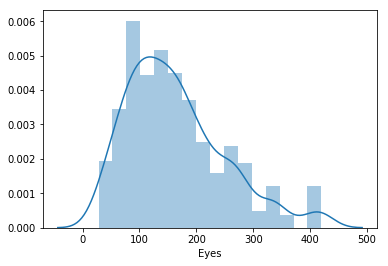

In [10]:
sns.distplot(uber['Eyes'])

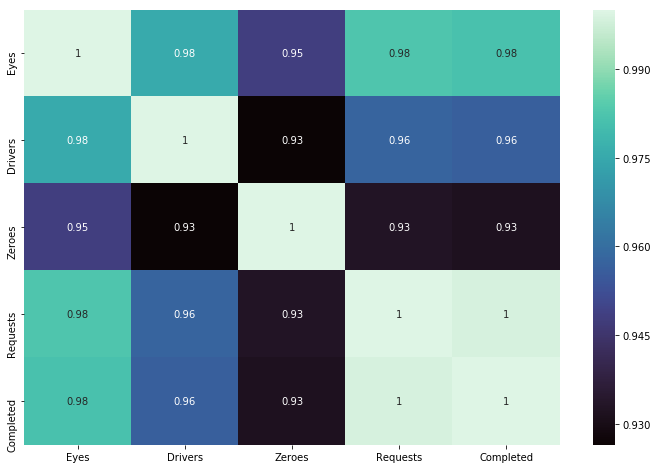

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(uber.corr(),annot=True,cmap='mako')

## Training a Linear Regression Model

Let's now begin to train out regression model. We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Completed column. 
### X and y arrays

In [13]:
uber.columns

Index(['Eyes', 'Drivers', 'Zeroes', 'Requests', 'Completed'], dtype='object')

In [14]:
X = uber[['Eyes', 'Drivers', 'Zeroes', 'Requests']]
y = uber['Completed']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

##### from sklearn.model_selection import train_test_split

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
#press shift tab (help) to look the model selection

#test_size = percentage of your sample data
#random_state = On a serious note, random_state ,simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [22]:
# print the intercept
print(lm.intercept_)

0.740383472398733


In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Eyes,-0.001955
Drivers,0.018716
Zeroes,-0.012425
Requests,0.927965


EXPLANATION

Interpreting the coefficients:

- Holding all other features fixed, a 1 customer increase in **Eyes** is associated with an **decrease of 0.001955 Completed**.
- Holding all other features fixed, a 1 customer increase in **Drivers** is associated with an **increase of 0.018716 Completed**.
- Holding all other features fixed, a 1 customer increase in **Zeroes** is associated with an **decrease of 0.012425 Completed**.
- Holding all other features fixed, a 1 customer increase in **Requests** is associated 
with an **increase of 0.927965 Completed**.







## Predictions from our Model

Let's grab predictions off our test set and see how well it did.

In [24]:
predictions = lm.predict(X_test)

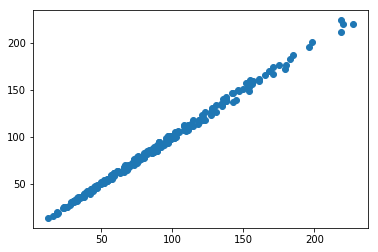

In [25]:
plt.scatter(y_test,predictions)

**Residual Histogram**

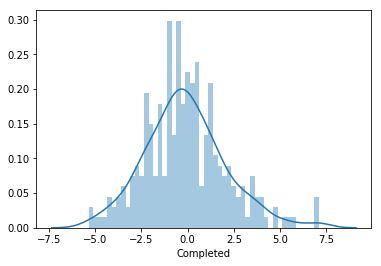

In [26]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6852891002043011
MSE: 4.799773473895125
RMSE: 2.1908385321367536
